### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [2]:
file_path = "C:/Users/Dell/Downloads/SY_NG/Myfile_dataA_5000.csv"
csvFile = pd.read_csv(file_path)

In [3]:
csvFile.shape

(5000, 9)

In [4]:
csvFile = csvFile.dropna()

In [5]:
csvFile.isna().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [6]:
csvFile.head()

,Gate_Length,Work_function,Channel_Thickness,Oxide_Thickness,SD_doping,SUBSTRATE_doping,Gate_Voltage,Drain_Voltage,Drain Current
0,1.220000e-08,4.606941,1.090000e-08,1.350000e-09,3.700000e+20,1.130000e+17,0.078664,0.216504,2.070000e-12
1,1.900000e-08,4.492014,1.090000e-08,1.360000e-09,4.060000e+20,2.210000e+17,0.496761,0.591274,2.120000e-12
2,1.080000e-08,4.331288,1.020000e-08,1.090000e-09,6.650000e+20,2.660000e+17,0.185672,0.798587,2.160000e-12
3,1.340000e-08,4.081299,1.010000e-08,1.200000e-09,4.820000e+20,2.490000e+17,0.166393,0.878277,2.210000e-12
4,1.440000e-08,4.254729,1.080000e-08,1.780000e-09,6.530000e+20,2.630000e+17,0.764250,0.111511,2.260000e-12


In [7]:
selected_features = [
    "Gate_Length", "Work_function", "Channel_Thickness", "Oxide_Thickness",
    "SD_doping", "SUBSTRATE_doping", "Gate_Voltage", "Drain_Voltage"
]
X = csvFile[selected_features]
y = csvFile["Drain Current"]

In [8]:
y_transformed = PowerTransformer(method='yeo-johnson').fit_transform(y.values.reshape(-1, 1)).flatten()
X_transformed = np.log1p(X)

### Data Splitting (80% Training Data and 20% Testing Data)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4000, 8) (4000,)
(1000, 8) (1000,)


In [10]:
np.random.seed(42)
y_train = y_train + np.random.normal(loc=0, scale=0.05, size=y_train.shape)

### Model: Lasso Regressor

In [22]:
preprocessor = make_pipeline(
    PolynomialFeatures(degree=6, interaction_only=False),  # Add quadratic terms and interactions
    QuantileTransformer(output_distribution='normal'),
    StandardScaler()
)

In [24]:
x_train_proc = preprocessor.fit_transform(x_train)
x_test_proc = preprocessor.transform(x_test)

In [25]:
lasso_cv = LassoCV(alphas=np.logspace(-6, 2, 50), cv=5, max_iter=5000, tol=1e-6, random_state=0)

In [26]:
lasso_cv.fit(x_train_proc, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.574e-03, tolerance: 2.790e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.106e-01, tolerance: 2.790e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.186e+00, tolerance: 

LassoCV(alphas=array([1.00000000e-06, 1.45634848e-06, 2.12095089e-06, 3.08884360e-06,
       4.49843267e-06, 6.55128557e-06, 9.54095476e-06, 1.38949549e-05,
       2.02358965e-05, 2.94705170e-05, 4.29193426e-05, 6.25055193e-05,
       9.10298178e-05, 1.32571137e-04, 1.93069773e-04, 2.81176870e-04,
       4.09491506e-04, 5.96362332e-04, 8.68511374e-04, 1.26485522e-03,
       1.84206997e-03, 2.68269580e-0...
       3.72759372e-02, 5.42867544e-02, 7.90604321e-02, 1.15139540e-01,
       1.67683294e-01, 2.44205309e-01, 3.55648031e-01, 5.17947468e-01,
       7.54312006e-01, 1.09854114e+00, 1.59985872e+00, 2.32995181e+00,
       3.39322177e+00, 4.94171336e+00, 7.19685673e+00, 1.04811313e+01,
       1.52641797e+01, 2.22299648e+01, 3.23745754e+01, 4.71486636e+01,
       6.86648845e+01, 1.00000000e+02]),
        cv=5, max_iter=5000, random_state=0, tol=1e-06)

In [27]:
# Predictions
y_pred = lasso_cv.predict(x_test_proc)

In [28]:
# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [29]:
print(f'Best alpha: {lasso_cv.alpha_:.6f}')
print(f'Mean Absolute Error: {mae:.6f}')
print(f'Mean Squared Error: {mse:.6f}')
print(f'Root Mean Squared Error: {rmse:.6f}')
print(f'R² Score: {r2:.4f}')

Best alpha: 0.000014
Mean Absolute Error: 0.292939
Mean Squared Error: 0.155874
Root Mean Squared Error: 0.394809
R² Score: 0.8511


### Model Inference Time

In [42]:
import time
import tensorflow as tf

num_inferences = 100
X_test_tensor = tf.convert_to_tensor(x_test_proc)

start_time = time.time()

for _ in range(num_inferences):
    predictions = lasso_cv.predict(X_test_tensor)

end_time = time.time()

average_inference_time = (end_time - start_time) / num_inferences
print(f"Average inference time for ML model: {average_inference_time:.6f} seconds")

Average inference time for ML model: 0.003855 seconds


ExactExplainer explainer: 5001it [00:22, 122.40it/s]                          


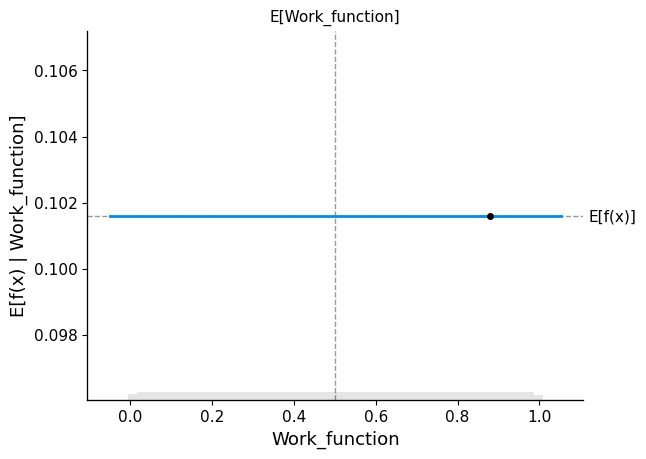

In [61]:
explainer_reg = shap.Explainer(lasso_reg.predict, csvFilex)
shap_values_reg = explainer_reg(csvFilex)

# make a standard partial dependence plot
sample_ind = 1000
shap.partial_dependence_plot(
    "Work_function",
    lasso_reg.predict,
    csvFilex,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values_reg[sample_ind : sample_ind + 1, :],
)

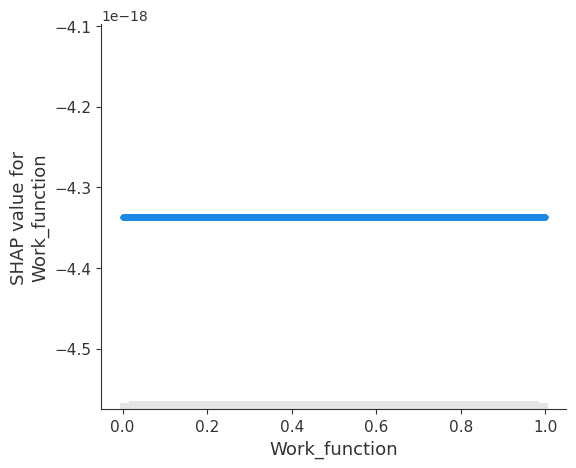

In [62]:
shap.plots.scatter(shap_values_reg[:, "Work_function"])

In [63]:
print(shap_values_reg.shape)

(5000, 8)


In [64]:
shap.plots.waterfall(shap_values_reg[sample_ind])

ValueError: Image size of -645922392x517 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x550 with 3 Axes>

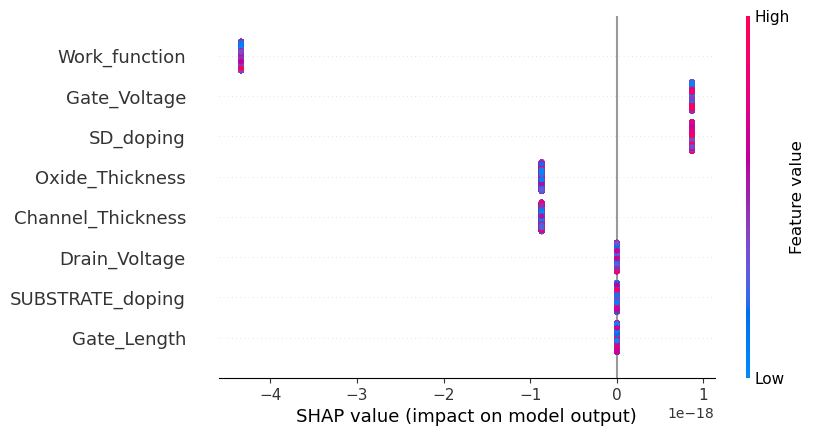

In [65]:
shap.plots.beeswarm(shap_values_reg)

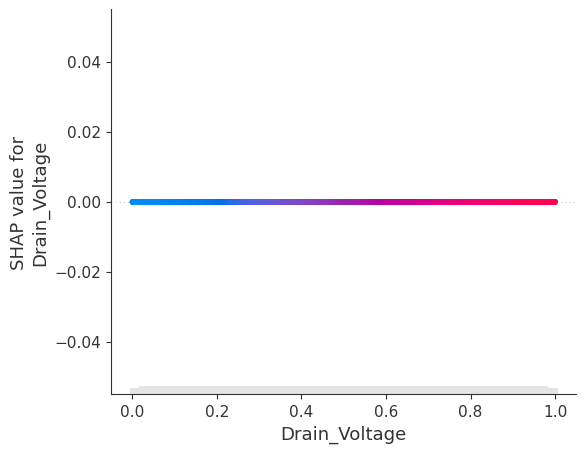

In [66]:
shap.plots.scatter(shap_values_reg[:, "Drain_Voltage"], color=shap_values_reg)

In [67]:
explainer = shap.KernelExplainer(model=lasso_reg.predict, data=x_train, link="identity")
shap_values = explainer.shap_values(x_test, nsamples=100)

Using 2975 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/750 [00:00<?, ?it/s]

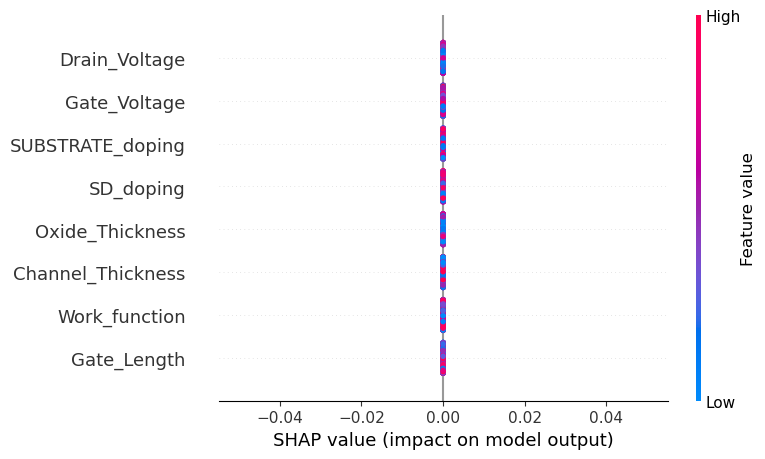

In [68]:
shap.summary_plot(shap_values, x_test)